In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


# EDA

In [52]:
df = pd.read_csv("dataset.csv")

In [53]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Elimino la columna "isFlaggedFraud" dado que no me da información útil para mi modelo.

In [54]:
df.drop(columns = ['isFlaggedFraud'], inplace =True)

In [55]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [56]:
df.shape

(6362620, 10)

In [57]:
df.isna().value_counts()

step   type   amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFraud
False  False  False   False     False          False           False     False           False           False      6362620
dtype: int64

No tenemos datos faltantes

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


Salida = "isFraud"  
Entradas Categóricas: "type", "nameOrig", "nameDest"

In [59]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [60]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

La salida está muy desbalanceada

## Columna type

In [61]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [62]:
df[df["isFraud"] == 1].type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

Solamente tengo fraudes (para este dataset) cuando las transacciones son de tipo Cash out y Transfer, por lo que podría eliminar las instancias de las demás clases, reduciendo en gran medida el desbalanceo de la salida.


In [63]:
df = df.drop(df[df['type']=="PAYMENT"].index)
df = df.drop(df[df['type']=="CASH_IN"].index)
df = df.drop(df[df['type']=="DEBIT"].index)

In [64]:
df.type.value_counts()

CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

Puedo hacer binary encoding para estas 2 clases que quedan.

In [65]:
serie=[]
for tipo in df["type"]:
    if tipo == 'CASH_OUT':
        tipo = 2
    elif tipo == 'TRANSFER':
        tipo = 1
    serie.append(tipo)

In [66]:
df['typeEnc']=serie

In [67]:
df.drop(columns="type", inplace=True)

## nameOrig

In [68]:
df.nameOrig.head(10)

2     C1305486145
3      C840083671
15     C905080434
19    C1670993182
24    C1984094095
42     C768216420
47    C1570470538
48     C512549200
51    C2072313080
58    C1976401987
Name: nameOrig, dtype: object

Este feature se compone de strings de un caracter (C) seguidos por un entero. Para codificarlo se puede quitarle este primer caracter y transformar a int() el resto del string.

In [69]:
serie=[]
for line in df["nameOrig"]:
    if line[0]== 'C':
        line=line[1:]
    line=int(line)
    serie.append(line)

In [70]:
df['nameOrigEnc']=serie

In [71]:
df.drop(columns="nameOrig", inplace=True)

In [72]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,typeEnc,nameOrigEnc
2,1,181.00,181.0,0.0,C553264065,0.0,0.00,1,1,1305486145
3,1,181.00,181.0,0.0,C38997010,21182.0,0.00,1,2,840083671
15,1,229133.94,15325.0,0.0,C476402209,5083.0,51513.44,0,2,905080434
19,1,215310.30,705.0,0.0,C1100439041,22425.0,0.00,0,1,1670993182
24,1,311685.89,10835.0,0.0,C932583850,6267.0,2719172.89,0,1,1984094095


## nameDest

In [73]:
df.nameDest.head(20)

2      C553264065
3       C38997010
15     C476402209
19    C1100439041
24     C932583850
42    C1509514333
47     C824009085
48     C248609774
51    C2001112025
58    C1937962514
60     C476800120
70    C2096057945
71     C766572210
72     C977993101
78    C1330106945
79    C1761291320
80     C783286238
81    C1749186397
82     C766572210
83     C392292416
Name: nameDest, dtype: object

In [74]:
serie=[]
for line in df["nameDest"]:
    if line[0]== 'C':
        line=line[1:]
    line=int(line)
    serie.append(line)

In [75]:
df['nameDestEnc']=serie

In [76]:
df.drop(columns="nameDest", inplace=True)

In [77]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEnc,nameOrigEnc,nameDestEnc
2,1,181.00,181.0,0.0,0.0,0.00,1,1,1305486145,553264065
3,1,181.00,181.0,0.0,21182.0,0.00,1,2,840083671,38997010
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,2,905080434,476402209
19,1,215310.30,705.0,0.0,22425.0,0.00,0,1,1670993182,1100439041
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,1,1984094095,932583850


## Visualizo las distribuciones

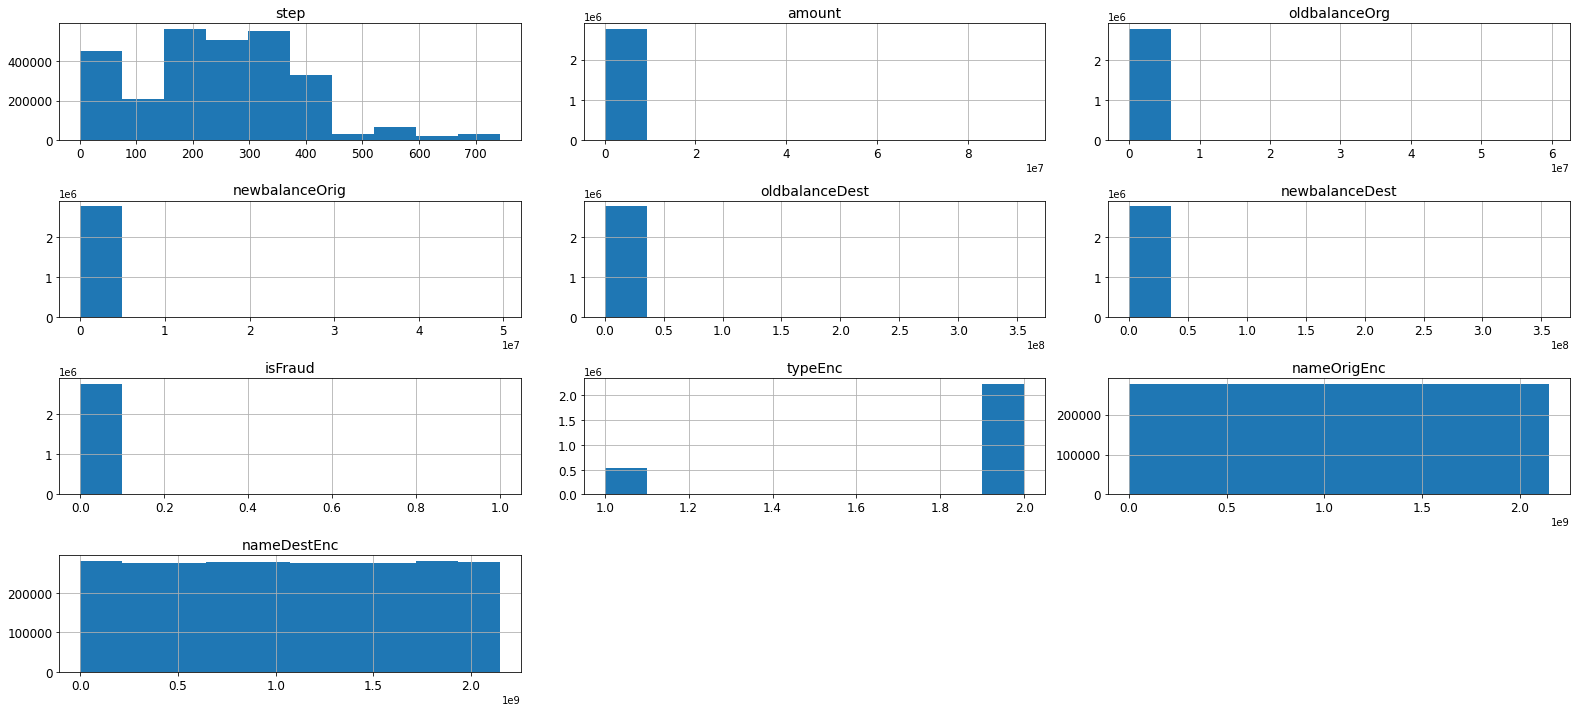

In [78]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

display_dataset_distributions(df)


## Correlación entre las variables

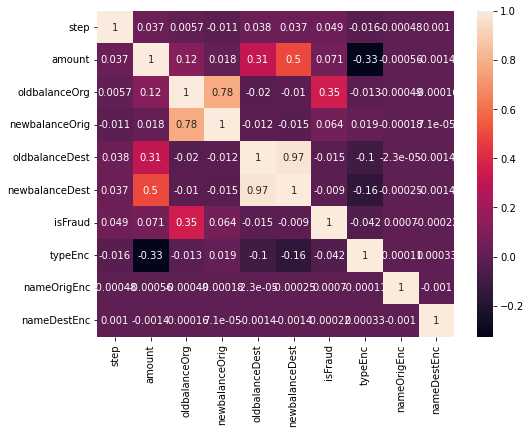

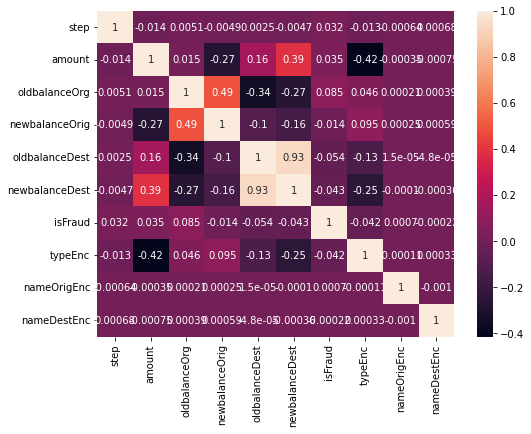

In [79]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()


Por muy alta correlación puedo eliminar una de las variables "newbalanceDest" o "oldbalanceDest".

Podría considerar eliminar también por la alta correlación (solo por Pearson) entre "newbalanceOrig" o "oldbalanceOrig", aunque debido a que estamos analizando fraude, es probable que en los casos en que éste sí se de, el balance del origen anterior a la transacción sea muy diferente al balance esperado luego de esta. Por lo tanto opto por dejar ambas variables.

In [80]:
df.drop(columns="oldbalanceDest", inplace=True)

In [81]:
df.head(15)

,step,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud,typeEnc,nameOrigEnc,nameDestEnc
2,1,181.00,181.00,0.00,0.00,1,1,1305486145,553264065
3,1,181.00,181.00,0.00,0.00,1,2,840083671,38997010
15,1,229133.94,15325.00,0.00,51513.44,0,2,905080434,476402209
19,1,215310.30,705.00,0.00,0.00,0,1,1670993182,1100439041
24,1,311685.89,10835.00,0.00,2719172.89,0,1,1984094095,932583850
42,1,110414.71,26845.41,0.00,2415.16,0,2,768216420,1509514333
47,1,56953.90,1942.02,0.00,64106.18,0,2,1570470538,824009085
48,1,5346.89,0.00,0.00,6453430.91,0,2,512549200,248609774
51,1,23261.30,20411.53,0.00,0.00,0,2,2072313080,2001112025
58,1,62610.80,79114.00,16503.20,8383.29,0,1,1976401987,1937962514


In [82]:
df.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

# Primer modelo (RF, sin balancear)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df.loc[:,df.columns != 'isFraud']

In [85]:
X_train, X_test,Y_train, Y_test = train_test_split(df.loc[:,df.columns != 'isFraud'],df.isFraud,train_size=0.8, random_state=50, stratify = df.isFraud)

La salida sigue desbalanceada, pero probaré un RF para ver primeros resultados.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, Y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test, Y_test)

0.9992780851931664

Accuracy:  0.9992780851931664
Precision:  [0.99932343 0.97992278]
Recall:  [0.99995294 0.77236762]


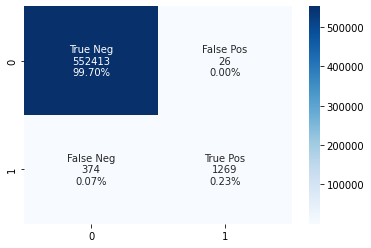

In [ ]:
cf_matrix = confusion_matrix(Y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Precision: ", precision_score(Y_test,y_pred, average = None))
print("Recall: ",recall_score(Y_test,y_pred, average = None))

Se puede mejorar aún balanceando los datos, buscando reducir principalmente la cantidad de falsos negativos (mejorar el Recall).

# Balanceo

In [88]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Pruebo con distintas estrategias, haciendo oversampling y downsampling

In [89]:
oversampler=RandomOverSampler(sampling_strategy=0.2);

X_train_os,y_train_os=oversampler.fit_resample(X_train,Y_train);
print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(Y_test.value_counts())

Composición del training set:
0    2209757
1     441951
Name: isFraud, dtype: int64

Composición del test set:
0    552439
1      1643
Name: isFraud, dtype: int64


In [90]:
undersampler=RandomUnderSampler(sampling_strategy="majority");

X_train_us,y_train_us=undersampler.fit_resample(X_train,Y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(Y_test.value_counts())

Composición del training set:
0    6570
1    6570
Name: isFraud, dtype: int64

Composición del test set:
0    552439
1      1643
Name: isFraud, dtype: int64


In [ ]:
clf_os = RandomForestClassifier()
clf_os = clf_os.fit(X_train_os, y_train_os)

Accuracy:  0.9993466670998156
Precision:  [0.99942646 0.96717724]
Recall:  [0.99991854 0.80706026]


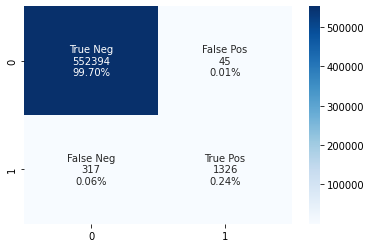

In [219]:
y_pred = clf_os.predict(X_test)

cf_matrix = confusion_matrix(Y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Precision: ", precision_score(Y_test,y_pred, average = None))
print("Recall: ",recall_score(Y_test,y_pred, average = None))

In [91]:
clf_us = RandomForestClassifier()
clf_us = clf_us.fit(X_train_us, y_train_us)

Accuracy:  0.9797051699928891
Precision:  [0.99997413 0.12667185]
Recall:  [0.97967015 0.991479  ]


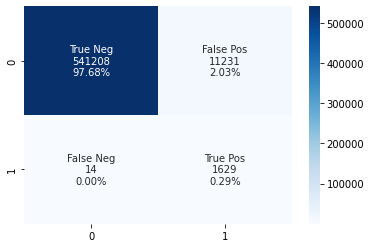

In [92]:
y_pred = clf_us.predict(X_test)

cf_matrix = confusion_matrix(Y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Precision: ", precision_score(Y_test,y_pred, average = None))
print("Recall: ",recall_score(Y_test,y_pred, average = None))

Mejora ampliamente el Recall usando undersampling. Este modelo podría ser usado debido a su reducida cantidad de Falsos Negativos, aumentado de esta manera la ganancia.


# Regresión Logística

In [96]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [97]:
logr = LogisticRegressionCV()

In [99]:
scaler=StandardScaler()  
    
X_train_sc=scaler.fit_transform(X_train_us) # Estandarizamos los datos     
X_test_sc=scaler.transform(X_test)

logr.fit(X_train_sc,y_train_us)
y_pred=logr.predict(X_test_sc)

Accuracy:  0.930674521099765
Precision:  [0.99961705 0.03645899]
Recall:  [0.93082494 0.88009738]


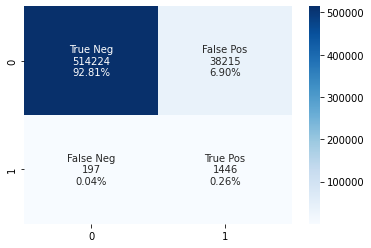

In [100]:
cf_matrix = confusion_matrix(Y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Precision: ", precision_score(Y_test,y_pred, average = None))
print("Recall: ",recall_score(Y_test,y_pred, average = None))

Para el mismo dataset ya balanceado obtengo un score peor que Random Forest, el cual había dado un puntaje muy bueno.

# Random Forest Tunning

In [101]:
from pprint import pprint

In [102]:
print('Parameters currently in use:\n')
pprint(clf_us.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [111]:
rf_random = RandomizedSearchCV(estimator=clf_us, param_distributions=random_grid,
                              n_iter = 100, scoring='recall', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [112]:
rf_random.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=2)

Accuracy:  0.9804974714933891
Precision:  [0.99998338 0.13144558]
Recall:  [0.98045576 0.99452222]


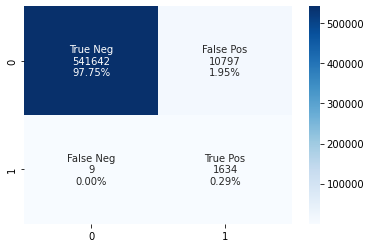

In [113]:
rf_random.best_estimator_.fit(X_train_us, y_train_us)

y_pred = rf_random.best_estimator_.predict(X_test)

cf_matrix = confusion_matrix(Y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Precision: ", precision_score(Y_test,y_pred, average = None))
print("Recall: ",recall_score(Y_test,y_pred, average = None))

# Conclusiones

Se decide optar por el último modelo, RF tuneado para maximizar el recall. De esta manera se tiene un porcentaje de Falsos Negativos muy reducido.

Cabe aclarar que este modelo asume que todas las transacciones que no son de tipo Transfer o Cash Out son consideradas no fraudulentas.